In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1-dim Random Walk
def one_dim_Random_Walk(number_of_steps = 10, plot_trajectory = False):
    # creating a array for containing coordinate
    x = np.zeros(number_of_steps + 1) # shape of x is 'number_of_steps+1' to store the origin
    # filling the coordinate with random variables
    for i in range(1, number_of_steps + 1):
        val = random.randint(1,2)
        if val == 1: # move up
            x[i] = x[i-1] + 1
        else: # move down
            x[i] = x[i-1] - 1
    if plot_trajectory == True:
        plt.plot(x)
        plt.title("1-D Random Walk (n = %d steps)" % number_of_steps)
        plt.xlabel("number of steps")
        plt.ylabel("coordinate")
        plt.show()
    return x[-1]  # The location after n steps
    

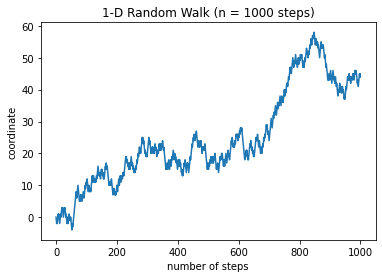

44.0

In [3]:
# Plot of a sample trajectory
one_dim_Random_Walk(number_of_steps = 1000, plot_trajectory = True)

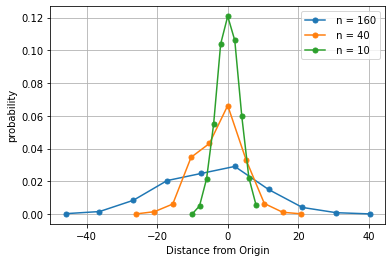

In [4]:
# PDF of distance from the origin
def plot_PDF_1D(steps = [160, 40, 10], number_of_experiment = 10000):
    random.seed(2)
    # creating a array for containing location
    location = np.zeros([len(steps), number_of_experiment])
    for i in range(len(steps)):
        for j in range(number_of_experiment):       
            location[i, j] = one_dim_Random_Walk(number_of_steps = steps[i])  
        density, bins = np.histogram(location[i, :], density = True)
        plt.plot(bins[:-1], density, '-o', markersize = 5, label = ' n = %d' % steps[i])
            
    plt.xlabel("Distance from Origin")
    plt.ylabel("probability")
    plt.legend()
    plt.grid(True)
    plt.show()
        
plot_PDF_1D(steps = [160, 40, 10], number_of_experiment = 10000)        

In [5]:
# 2-dim Random Walk
def two_dim_Random_Walk(number_of_steps = 10, plot_trajectory = False):
    # creating two arrays for containing coordinate
    x = np.zeros(number_of_steps + 1) # shape of x is 'number_of_steps+1' to store the origin
    y = np.zeros(number_of_steps + 1)
    # filling the coordinate with random variables
    for i in range(1, number_of_steps + 1):
        val = random.randint(1,4)
        if val == 1: # move right
            x[i] = x[i-1] + 1
            y[i] = y[i-1]
        elif val == 2: # move left
            x[i] = x[i-1] - 1
            y[i] = y[i-1]
        elif val == 3: # move up
            x[i] = x[i-1]
            y[i] = y[i-1] + 1
        else: # move down
            x[i] = x[i-1]
            y[i] = y[i-1] - 1
    if plot_trajectory == True:
        plt.plot(x, y)
        plt.title("2-D Random Walk (n = %d steps)" % number_of_steps)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
    return x[-1], y[-1]  # The location after n steps

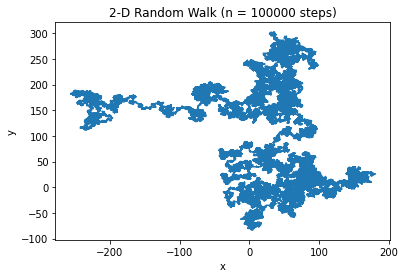

(-216.0, 172.0)

In [6]:
# Plot of a sample trajectory
two_dim_Random_Walk(number_of_steps = 100000, plot_trajectory = True)

In [7]:
# PDF of distance from the origin
from mpl_toolkits.mplot3d import Axes3D
def plot_PDF_2D(steps = [160], number_of_experiment = 10000):
    random.seed(2)
    fig = plt.figure()
    ax = Axes3D(fig)
    # creating a array for containing location
    location_x = np.zeros([len(steps), number_of_experiment])
    location_y = np.zeros([len(steps), number_of_experiment])
    for i in range(len(steps)):
        for j in range(number_of_experiment):       
            location_x[i, j], location_y[i, j] = two_dim_Random_Walk(number_of_steps = steps[i])                  
        density, bins_x, bins_y = np.histogram2d(location_x[i, :], location_y[i, :], density = True)
        X, Y = np.meshgrid(bins_x[:-1], bins_y[:-1])
        surf = ax.plot_surface(X, Y, density, label = ' n = %d' % steps[i])
        surf._facecolors2d=surf._facecolors3d
        surf._edgecolors2d=surf._edgecolors3d
            
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("probability")
    ax.legend()
    ax.grid(True)
    
    plt.show()      

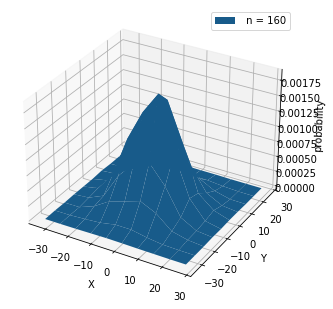

In [8]:
plot_PDF_2D(steps = [160], number_of_experiment = 10000)  

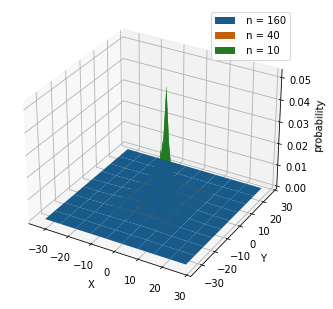

In [11]:
plot_PDF_2D(steps = [160, 40, 10], number_of_experiment = 10000)  